# Titanic Data Analysis

The data set which I am going to explore contains the information gathered from 891 of the 2224 passengers and crew on board the Titanic. The Data set has various columns like 
- Survival
- Pclass(Ticket class)
- Sex
- Age
- Sibsp(# of siblings / spouses aboard the Titanic)
- Parch(# of parents / children aboard the Titanic)
- Ticket(Ticket Number)
- Fare
- Cabin(cabin Number)
- Embarked (port of Embarkation).   

## Loading Data From Csv

For importing data from csv, pandas has a built in function which reads the information into a dataframe. 

In [1]:
import pandas as pd

titanic_data = pd.read_csv('titanic_data.csv')
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Overall Metrics

The information has a column called 'survived' whose values are either 0 or 1, using this column we can count the total number of deaths and survivors.

In [46]:
total_no_passengers = len(titanic_data['PassengerId'])
survival_data = titanic_data['Survived']
survivied = (survival_data == 1).sum()
casualties = (survival_data == 0).sum()

print('------------------------------------------')
print('Total number of passengers on board: ',total_no_passengers)
print('Total number of survivors: ',survivied)
print('Total number of casualties: ',casualties)
print('------------------------------------------')

------------------------------------------
Total number of passengers on board:  891
Total number of survivors:  342
Total number of casualties:  549
------------------------------------------


- The following pie chart shows the distribution of survivors and deaths

Populating the interactive namespace from numpy and matplotlib


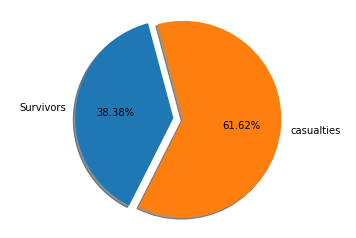

In [5]:
%pylab inline
import matplotlib.pyplot as plt

def drawPieChart(labels,sizes,explode,startangle):
    plt.pie(sizes, explode=explode, labels=labels,autopct='%1.2f%%', shadow=True, startangle=startangle) 
    plt.axis('equal')
    plt.show()
    
drawPieChart(['Survivors', 'casualties'],[survivied,casualties],(0.1, 0),105)    

## Overall Metrics By Gender

The above metrics show the total number of survivors and casualties, now let us explore these metrics based on the gender.
Using the groupby function on dataframe based on the gender, we can count the total number of female and male survivors. when we calulate female survivors and male survivors in terms of percentages with respect to total survivors  , we find that female survivors constitute (68.13%) and male survivors constitute (31.87%). Using this information, we can conclude that females where given more preference in using life saving materials like life boats, etc.



In [7]:
male_count = (titanic_data['Sex'] == 'male').sum()
female_count = (titanic_data['Sex'] == 'female').sum()
group_by_gender = titanic_data.groupby('Sex').sum()['Survived']
male_survivors = group_by_gender['male']
female_survivors = group_by_gender['female']
male_casualties = male_count - male_survivors
female_casualties = female_count - female_survivors

print('-------------------------------------')
print('Total number of males: ',male_count)
print('Total number of male survivors: ',male_survivors)
print('Total number of male casualties: ',male_deaths)
print('--------------------------------------')
print('Total number of females: ',female_count)
print('Total number of female survivors: ',female_survivors)
print('Total number of female casualties: ',female_deaths)
print('--------------------------------------')

-------------------------------------
Total number of males:  577
Total number of male survivors:  109
Total number of male casualties:  468
--------------------------------------
Total number of females:  314
Total number of female survivors:  233
Total number of female casualties:  81
--------------------------------------


- The following pie chart shows the distribution of male and female survivors

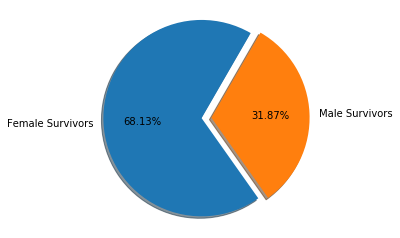

In [8]:
drawPieChart(['Female Survivors', 'Male Survivors'],[female_survivors,male_survivors],(0.1, 0),60)

## Explore Casualties based on Pclass

Let us exlpore the Casualties based on Pclass(A proxy for socio-economic status (SES), 1st = Upper, 2nd = Middle, 3rd = Lower) to see whether passengers were given priority based on their class. Now Lets explore some metrics related to Pclass.


In [43]:
pclass = titanic_data['Pclass']
pclass_1 = (pclass == 1).sum()
pclass_2 = (pclass == 2).sum()
pclass_3 = (pclass == 3).sum()

pclass_1_survivors = ((pclass == 1)&(survival_data == 1)).sum()
pclass_1_casualties = ((pclass == 1)&(survival_data == 0)).sum()

pclass_2_survivors = ((pclass == 2)&(survival_data == 1)).sum()
pclass_2_casualties = ((pclass == 2)&(survival_data == 0)).sum()

pclass_3_survivors = ((pclass == 3)&(survival_data == 1)).sum()
pclass_3_casualties = ((pclass == 3)&(survival_data == 0)).sum()

print('----------------------------------')
print('Pclass 1 Metrics: ')
print('Total Number Of People: ',pclass_1)
print('Total Number Of Survivors: ',pclass_1_survivors)
print('Total Number Of casualties: ',pclass_1_casualties)
print('Survival Rate: {0}%'.format(round((pclass_1_survivors/pclass_1)*100.0,2)))
print('----------------------------------')

print('Pclass 2 Metrics: ')
print('Total Number Of People: ',pclass_2)
print('Total Number Of Survivors: ',pclass_2_survivors)
print('Total Number Of casualties: ',pclass_2_casualties)
print('Survival Rate: {0}%'.format(round((pclass_2_survivors/pclass_2)*100.0,2)))
print('----------------------------------')

print('Pclass 3 Metrics: ')
print('Total Number Of People: ',pclass_3)
print('Total Number Of Survivors: ',pclass_3_survivors)
print('Total Number Of casualties: ',pclass_3_casualties)
print('Survival Rate: {0}%'.format(round((pclass_3_survivors/pclass_3)*100.0,2)))
print('----------------------------------')

----------------------------------
Pclass 1 Metrics: 
Total Number Of People:  216
Total Number Of Survivors:  136
Total Number Of casualties:  80
Survival Rate: 62.96%
----------------------------------
Pclass 2 Metrics: 
Total Number Of People:  184
Total Number Of Survivors:  87
Total Number Of casualties:  97
Survival Rate: 47.28%
----------------------------------
Pclass 3 Metrics: 
Total Number Of People:  491
Total Number Of Survivors:  119
Total Number Of casualties:  372
Survival Rate: 24.24%
----------------------------------


- From the above listed metrics, we can say that people from upper class(pclass = 1) were given priority as they had the highest survival rate of (62.96%) which is greater than the survival rates of both middle class and lower class. Lets plot a histogram of casualties to get a more precise picture

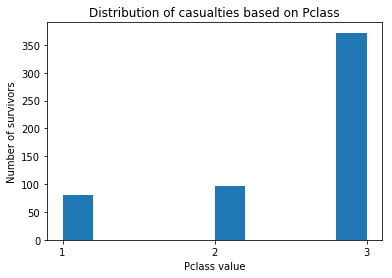

In [38]:
pclass_casualties = pclass[survival_data == 0]

def drawHistogram(data,xticks,title,xlabel,ylabel):
    plt.xticks(xticks)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.hist(data)
    plt.show()

drawHistogram(pclass_casualties,range(1,4),'Distribution of casualties based on Pclass',
              'Pclass value','Number of survivors')

- The Histogram above shows the distribution of casualties based on their pclass, as we can observe that lower class has the   most number of casualties when compared to upper class and middle class. So, Now we can say that lower class people got the   least priority for life saving materials like life boats, etc. 

## Explore Survivors And Casualties Based On Age

- In this part of data exploration, I want to check whether did age played any role in survival.
- As a first step towards the Age data exploration, Lets take a look at age data for any anomalies.

In [54]:
titanic_data[['PassengerId','Survived','Name','Sex','Age']].head(7)

,PassengerId,Survived,Name,Sex,Age
0,1,0,"Braund, Mr. Owen Harris",male,22.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,3,1,"Heikkinen, Miss. Laina",female,26.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,5,0,"Allen, Mr. William Henry",male,35.0
5,6,0,"Moran, Mr. James",male,NaN
6,7,0,"McCarthy, Mr. Timothy J",male,54.0


- As we see that row number 5 contains NaN for Age column data,We need to drop all these values before taking the age data into consideration 
- Now lets take a look at some metrics for Age data.

In [55]:
age_data = titanic_data['Age']
survived_age_data = age_data[survival_data==1].dropna()
casualties_age_data = age_data[survival_data==0].dropna()

oldest_to_survive = survived_age_data.max()
youngest_to_survive = survived_age_data.min()

oldest_to_die = casualties_age_data.max()
youngest_to_die = casualties_age_data.min()

mean_age_survivors = survived_age_data.mean()
mean_age_casualties = casualties_age_data.mean()

print('------------------------------')
print('Oldest To Survive: ',oldest_to_survive)
print('Youngest To Survive: ',youngest_to_survive)
print('------------------------------')
print('Oldest To die: ',oldest_to_die)
print('Youngest To die: ',youngest_to_die)
print('------------------------------')
print('Mean Age Of Survivors: ',round(mean_age_survivors,2))
print('Mean Age Of Casualties: ',round(mean_age_casualties,2))
print('------------------------------')

------------------------------
Oldest To Survive:  80.0
Youngest To Survive:  0.42
------------------------------
Oldest To die:  74.0
Youngest To die:  1.0
------------------------------
Mean Age Of Survivors:  28.34
Mean Age Of Casualties:  30.63
------------------------------
